# DBSCAN without Libraries 

In [1]:
import time
import warnings
import queue

import numpy as np
import pandas as pd

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn import datasets
# from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm

from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from random import sample

from itertools import cycle, islice

In [2]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
n_components = 2 # the number of clusters


X1, y1 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X2, y2 = datasets.make_moons(n_samples=n_samples, noise=0.05)
X3, y3 = datasets.make_blobs(n_samples=n_samples, random_state=8)
X4, y4 = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170

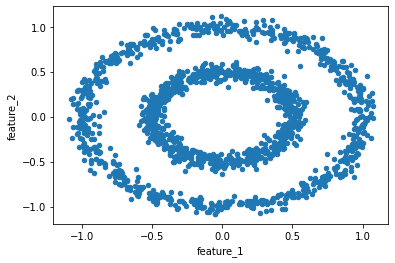

In [3]:
# scatter plot, data points annotated by different colors
df = pd.DataFrame(dict(feature_1=X1[:,0], feature_2=X1[:,1], label=y1))


cluster_name = set(y1)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = pyplot.subplots()

grouped = df.groupby('label')

for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', color=colors[key].reshape(1,-1))
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2')

# pyplot.title('Original 2D Data from {} Clusters'.format(n_components))
pyplot.show()

In [4]:
# Based on Implementation of 
# https://github.com/kiat/Machine-Learning-Algorithms-from-Scratch/blob/master/DBSCAN.py

class CustomDBSCAN():
    def __init__(self):
        self.core = -1
        self.border = -2

    # Find all neighbour points at epsilon distance
    def neighbour_points(self, data, pointId, epsilon):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[pointId])]) <= epsilon:
                points.append(i)
        return points

    # Fit the data into the DBSCAN model
    def fit(self, data, Eps, MinPt):
        
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, Eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= MinPt):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and 
        # find the indirectly reachable points
        # We are essentially performing Breadth First search of all points 
        # which are within Epsilon distance for each other
        
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

    # Visualize the clusters
    def visualize(self, data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for i in range(numberOfClusters):
            if (i == 0):
                # Plot all outliers point as black
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()

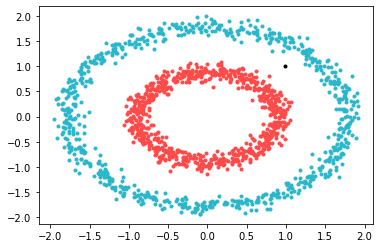

In [5]:
dataset = df.astype(float).values.tolist()

# normalize dataset
X = StandardScaler().fit_transform(dataset)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 4)

# print(point_labels, clusters)



custom_DBSCAN.visualize(X, point_labels, clusters)

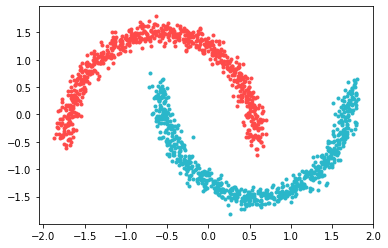

In [6]:
# Let us change the data and see the results 

df = pd.DataFrame(dict(feature_1=X2[:,0], feature_2=X2[:,1], label=y2))


dataset = df.astype(float).values.tolist()

# normalize dataset
X = StandardScaler().fit_transform(dataset)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 4)

# print(point_labels, clusters)

custom_DBSCAN.visualize(X, point_labels, clusters)

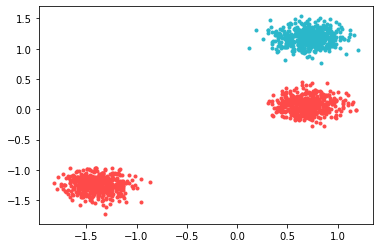

In [7]:
# Let us change the data and see the results 

df = pd.DataFrame(dict(feature_1=X3[:,0], feature_2=X3[:,1], label=y3))


dataset = df.astype(float).values.tolist()

# normalize dataset
X = StandardScaler().fit_transform(dataset)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 4)

# print(point_labels, clusters)

custom_DBSCAN.visualize(X, point_labels, clusters)

/Users/kiat/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:770: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/kiat/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:711: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


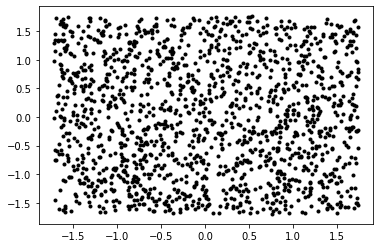

In [8]:
# Let us change the data and see the results 

df = pd.DataFrame(dict(feature_1=X4[:,0], feature_2=X4[:,1], label=y4))


dataset = df.astype(float).values.tolist()

# normalize dataset
X = StandardScaler().fit_transform(dataset)

custom_DBSCAN = CustomDBSCAN()
point_labels, clusters = custom_DBSCAN.fit(X, 0.25, 4)

# print(point_labels, clusters)

custom_DBSCAN.visualize(X, point_labels, clusters)